In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA CASE STUDY
### PROBLEM STATEMENT : predict the loan defaulter customer from the retail company data.

In [2]:
data=pd.read_csv('loan (1).csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18716\1390063480.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('loan (1).csv')


In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
data.shape

(39717, 111)

# Missing values

In [7]:
null_values=[(x,data[x].isnull().mean()*100) for x in data]

In [8]:
null_df=pd.DataFrame(null_values,columns=['columns_name','percentage'])

In [9]:
null_df

,columns_name,percentage
0,id,0.000000
1,member_id,0.000000
2,loan_amnt,0.000000
3,funded_amnt,0.000000
4,funded_amnt_inv,0.000000
...,...,...
106,tax_liens,0.098195
107,tot_hi_cred_lim,100.000000
108,total_bal_ex_mort,100.000000
109,total_bc_limit,100.000000


In [10]:
# remoove cols where percentage of null values is more than 50%

In [11]:
drop_cols=list(null_df[null_df['percentage']>50]['columns_name'])
drop_cols

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


In [12]:
data.drop(drop_cols,axis=1,inplace=True)

In [13]:
# unique values in cols

In [14]:
unique=data.nunique()

In [15]:
unique=unique[unique.values==1]

In [16]:
data.drop(labels=list(unique.index),axis=1,inplace=True)

In [17]:
data.shape

(39717, 45)

In [18]:
# no need of these cols
drop_column=['id','member_id','url','zip_code']
data.drop(labels=drop_column,axis=1,inplace=True)
print(data.shape,"rows & columns")

(39717, 41) rows & columns


In [19]:
# modify the cols

In [20]:

data['int_rate']=(data['int_rate'].str.strip('%').astype(float))

In [21]:
## convert these cols int int
num_col=['loan_amnt','funded_amnt','funded_amnt_inv','installment']
data[num_col]=data[num_col].apply(pd.to_numeric)

In [22]:
# univariate analysis
need_columns=['loan_amnt','funded_amnt','int_rate','home_ownership','annual_inc','funded_amnt_inv','installment','purpose','loan_status']

In [23]:
# loan purpose
data.groupby('purpose')['purpose'].count()

purpose
car                    1549
credit_card            5130
debt_consolidation    18641
educational             325
home_improvement       2976
house                   381
major_purchase         2187
medical                 693
moving                  583
other                  3993
renewable_energy        103
small_business         1828
vacation                381
wedding                 947
Name: purpose, dtype: int64

In [24]:
len(data.groupby('purpose')['purpose'].count())

14

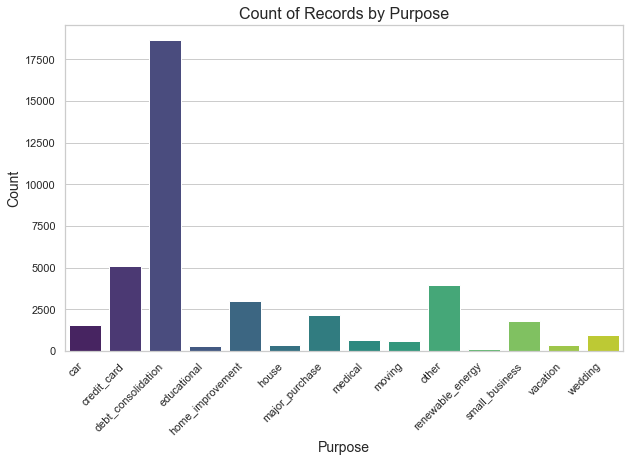

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data in a variable called 'grouped_data'
grouped_data = data.groupby('purpose')['purpose'].count().reset_index(name='count')

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='purpose', y='count', data=grouped_data, palette="viridis")
bar_plot.set_title('Count of Records by Purpose', fontsize=16)
bar_plot.set_xlabel('Purpose', fontsize=14)
bar_plot.set_ylabel('Count', fontsize=14)

# Rotating x-axis labels for better readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


### around 16000 people take loan for debt_consolidation

## loan amount analysis

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:title={'center':'Box Plot'}, xlabel='loan_amnt'>

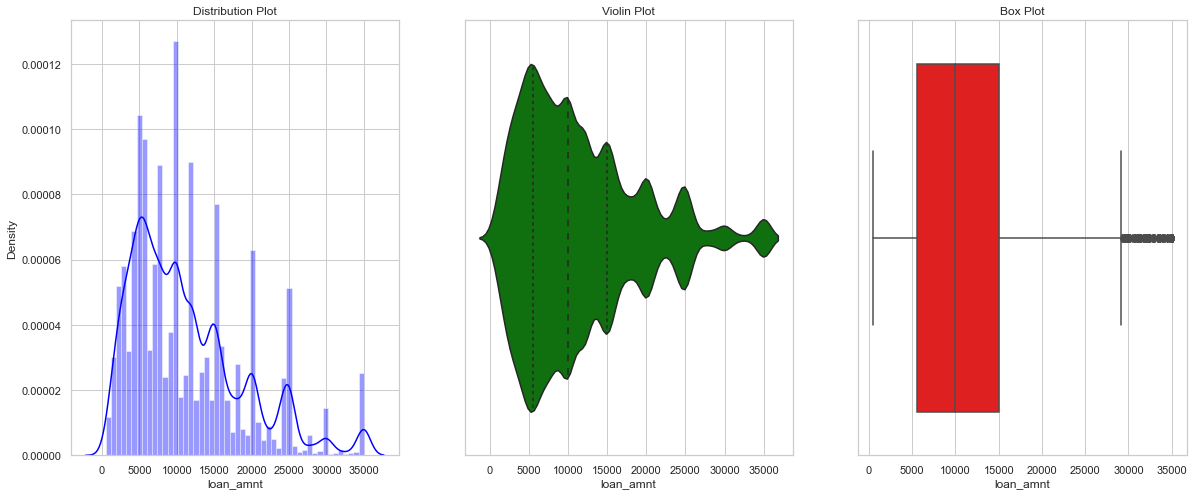

In [26]:
# loan amount
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(data['loan_amnt'],ax=ax[0],color='blue')
ax[1].set_title("Violin Plot")
sns.violinplot(data=data,x='loan_amnt',ax=ax[1],inner='quartile',color='green')
ax[2].set_title("Box Plot")
sns.boxplot(data=data,x='loan_amnt',ax=ax[2],orient='v',color='red')

### from above following plots we came to know that 75% of the loan amount lie between 5000-15000

## anual income

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:title={'center':'Box Plot'}, xlabel='annual_inc'>

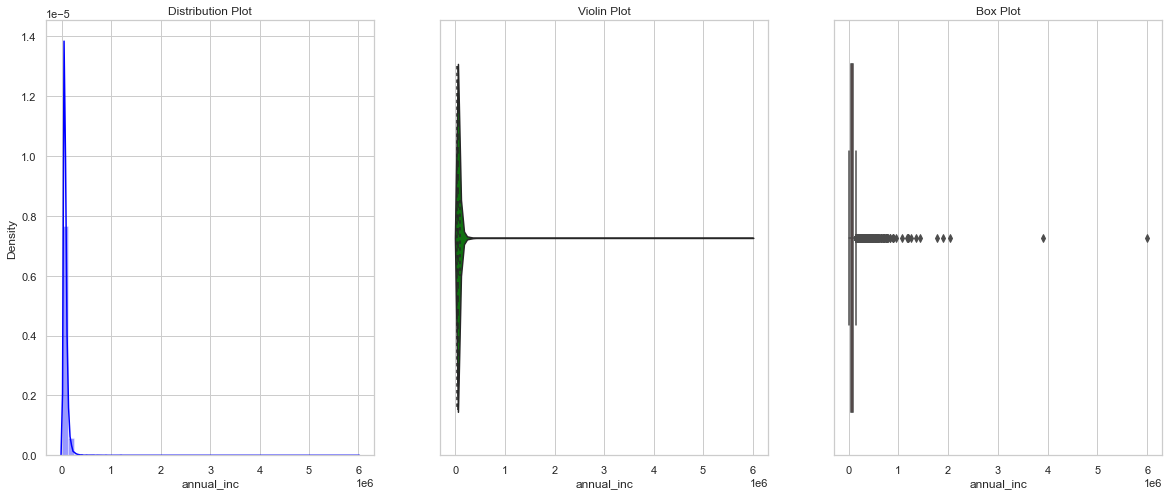

In [27]:
# annual income
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(data['annual_inc'],ax=ax[0],color='blue')
ax[1].set_title("Violin Plot")
sns.violinplot(data=data,x='annual_inc',ax=ax[1],inner='quartile',color='green')
ax[2].set_title("Box Plot")
sns.boxplot(data=data,x='annual_inc',ax=ax[2],orient='v',color='red')

### there are so many outliers in annual income

In [29]:
# remove outliers
qua=data['annual_inc'].quantile(0.90) # 90% concentration of data
data=data[data['annual_inc']<qua] 
data['annual_inc'].describe()

count     35740.000000
mean      57387.003107
std       23644.470090
min        4000.000000
25%       39996.000000
50%       54996.000000
75%       74000.000000
max      115956.000000
Name: annual_inc, dtype: float64

## Plot anual_income

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:title={'center':'Box Plot'}, xlabel='annual_inc'>

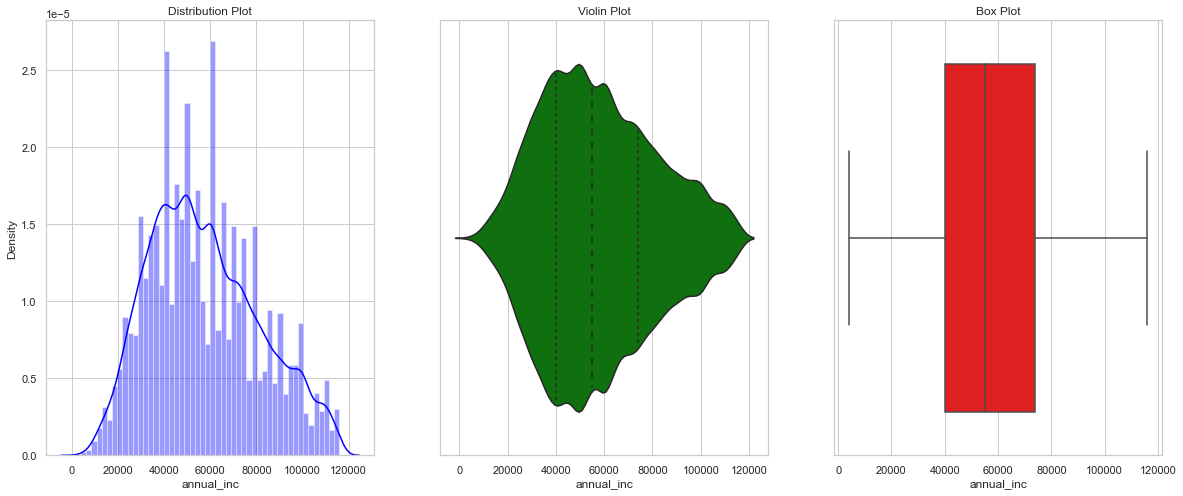

In [30]:
# annual income after removing outliers 
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(data['annual_inc'],ax=ax[0],color='blue')
ax[1].set_title("Violin Plot")
sns.violinplot(data=data,x='annual_inc',ax=ax[1],inner='quartile',color='green')
ax[2].set_title("Box Plot")
sns.boxplot(data=data,x='annual_inc',ax=ax[2],orient='v',color='red')

## aroind 75% of the data have annual income bw 40000 - 75,000 annually 

## Bivariate analysis 

In [32]:
# analysis bw purpose and loan status 

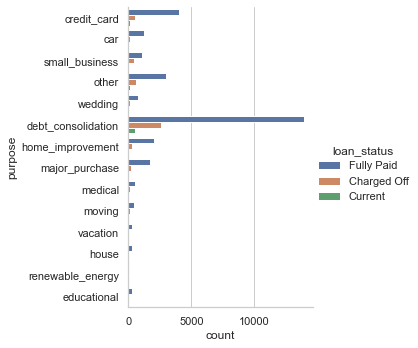

In [34]:
sns.catplot(y="purpose", hue="loan_status", kind="count",data=data)

### approx 85% of the applicants applied loan for paying their debt_consolidations.

In [35]:
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

## home_ownership vs loan_status

In [36]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE']
data.drop(data[data['home_ownership'].isin(rem)].index,inplace=True)
data.home_ownership.unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18716\355391852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['home_ownership'].isin(rem)].index,inplace=True)


array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

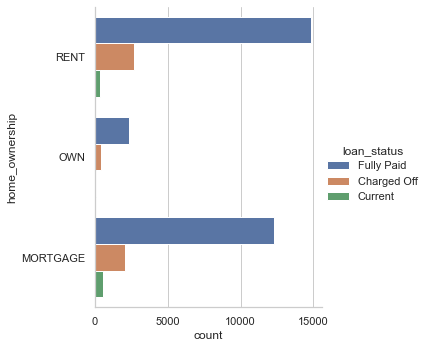

In [37]:
sns.catplot(y='home_ownership', hue="loan_status", kind="count",data=data)

### 33% rent customers are fully paid lenders

## loan_status vs term

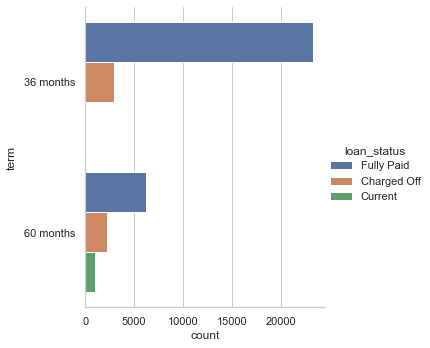

In [38]:
sns.catplot(y='term', hue="loan_status", kind="count",data=data)

### 68% customers fully paid the loan in the term period of 36months

## loan_status vs verification_status

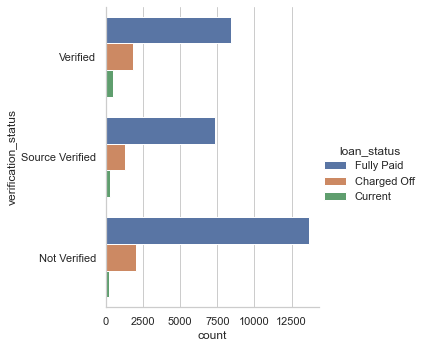

In [39]:
sns.catplot(y='verification_status', hue="loan_status", kind="count",data=data)

### around 62% people are not verified and fully paid their loan

## data vs loan amount

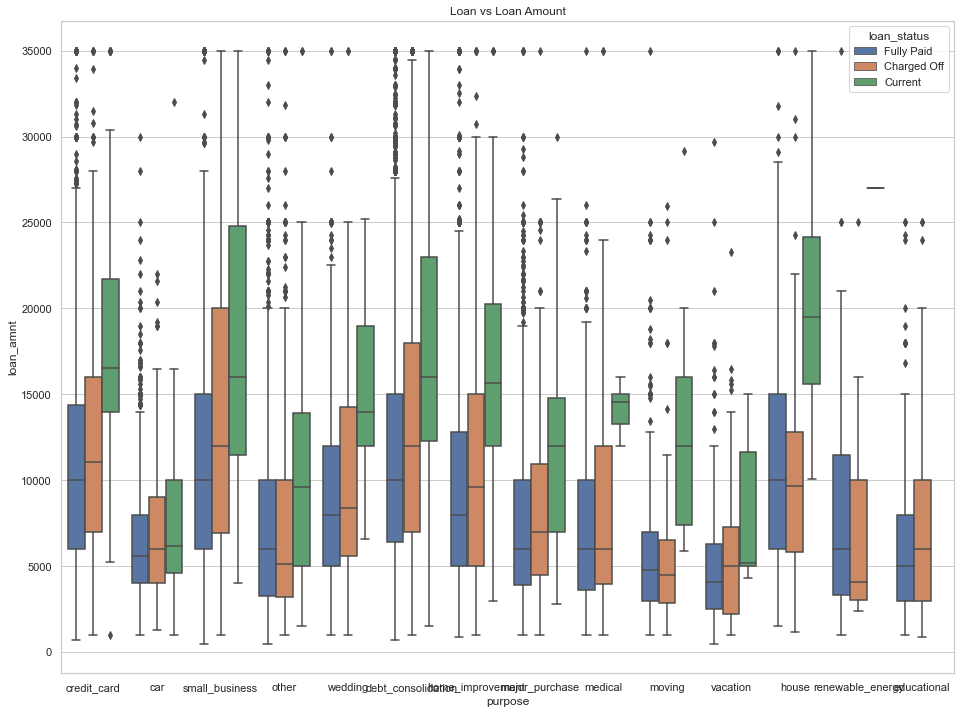

In [40]:
plt.figure(figsize=(16,12))
sns.boxplot(data =data, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Loan vs Loan Amount')
plt.show()

### max amount of loan taken by small buisnesses

### max loan is fully paid by debt consolidations

## loan correlation

In [41]:
loan_correlation = data.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.982197,0.939110,0.289744,0.929640,0.394097,0.107267,-0.042416,-0.000994,0.161185,...,0.192751,0.877057,0.843433,0.839765,0.728345,0.031880,0.137110,0.070451,0.438520,-0.030261
funded_amnt,0.982197,1.000000,0.956792,0.295510,0.954654,0.390874,0.106664,-0.042004,-0.000283,0.159014,...,0.194466,0.893347,0.859676,0.857186,0.736924,0.034252,0.139398,0.072995,0.443652,-0.031068
funded_amnt_inv,0.939110,0.956792,1.000000,0.290659,0.901142,0.374045,0.113872,-0.046117,-0.014432,0.147725,...,0.203718,0.871199,0.904020,0.832753,0.730252,0.013825,0.125654,0.057888,0.435302,-0.036120
int_rate,0.289744,0.295510,0.290659,1.000000,0.267337,0.050909,0.107750,0.150014,0.133944,-0.014388,...,0.125926,0.285554,0.282011,0.164205,0.517055,0.084028,0.119212,0.063422,0.141816,0.087239
installment,0.929640,0.954654,0.901142,0.267337,1.000000,0.388717,0.094036,-0.030100,0.000325,0.154412,...,0.123237,0.848266,0.806475,0.839235,0.633337,0.043985,0.120444,0.073249,0.389945,-0.026647
annual_inc,0.394097,0.390874,0.374045,0.050909,0.388717,1.000000,-0.046907,0.024631,0.028358,0.264271,...,0.055009,0.369188,0.355035,0.371761,0.262673,-0.004484,0.034563,0.013380,0.203791,0.000681
dti,0.107267,0.106664,0.113872,0.107750,0.094036,-0.046907,1.000000,-0.030754,0.007179,0.301945,...,0.044599,0.103723,0.109312,0.081348,0.132595,-0.011439,0.027260,0.013778,0.027535,0.002237
delinq_2yrs,-0.042416,-0.042004,-0.046117,0.150014,-0.030100,0.024631,-0.030754,1.000000,0.008718,0.014497,...,-0.007737,-0.032947,-0.037490,-0.047152,0.011357,0.026025,0.010061,0.008730,-0.016814,0.004036
inq_last_6mths,-0.000994,-0.000283,-0.014432,0.133944,0.000325,0.028358,0.007179,0.008718,1.000000,0.090101,...,-0.007783,-0.021447,-0.030481,-0.035127,0.016517,0.031499,0.017693,0.010282,0.020813,0.017266
open_acc,0.161185,0.159014,0.147725,-0.014388,0.154412,0.264271,0.301945,0.014497,0.090101,1.000000,...,0.021502,0.143866,0.134968,0.144325,0.104301,-0.019829,0.012018,0.002375,0.072980,0.012010


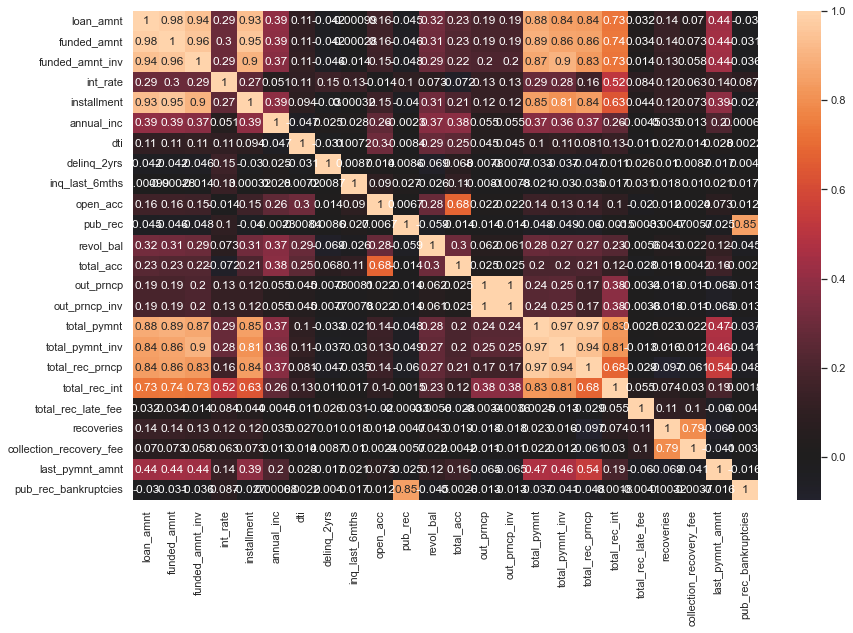

In [42]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True,center=0)
plt.show()

In [43]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,35648.000000,35648.000000,35648.000000,35648.000000,35648.000000,35648.000000,35648.000000,35648.000000,35648.000000,35648.000000,...,35648.000000,35648.000000,35648.000000,35648.000000,35648.000000,35648.000000,35648.000000,35648.000000,35648.000000,35023.000000
mean,10559.417779,10322.297885,9808.068763,11.944211,305.733308,57385.349726,13.596448,0.141915,0.859151,9.089654,...,46.144850,11376.907111,10833.015252,9186.763164,2099.907093,1.306973,88.929956,11.269606,2468.646126,0.045142
std,6948.676940,6702.533560,6642.076186,3.676805,193.161556,23642.488872,6.682637,0.484363,1.060011,4.316612,...,343.971356,8362.237422,8272.389669,6559.265819,2384.810989,6.955266,647.113714,137.401946,4100.034123,0.208441
min,500.000000,500.000000,0.000000,5.420000,15.690000,4000.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,5000.000000,4975.000000,8.940000,161.700000,39996.000000,8.500000,0.000000,0.000000,6.000000,...,0.000000,5375.913797,4870.930000,4200.000000,632.210000,0.000000,0.000000,0.000000,208.125000,0.000000
50%,9000.000000,9000.000000,8250.000000,11.830000,266.090000,54996.000000,13.760000,0.000000,1.000000,8.000000,...,0.000000,9292.935443,8763.740000,7999.990000,1273.045000,0.000000,0.000000,0.000000,508.520000,0.000000
75%,14550.000000,14000.000000,13450.000000,14.420000,401.600000,74000.000000,18.900000,0.000000,1.000000,11.000000,...,0.000000,15400.255353,14762.580000,12264.595000,2628.400000,0.000000,0.000000,0.000000,3033.717500,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1302.690000,115956.000000,29.990000,11.000000,8.000000,42.000000,...,6307.370000,56199.439950,55867.020000,35000.020000,22716.420000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


#### We have analysed the multiple features for bank loan defaulters to come up with the criterion description
#### for all loan borrowers on the basis of defaulter(who have not paid the loan),
#### current payers(who are currently paying loan amount).